# I. Environment settings

In [1]:
import pandas as pd
import re
import numpy as np
import datetime

# II. Original data

## Import the raw data

In [2]:
df_pages1 = pd.read_csv('source_data/tabula_output/tabula-reports_first_pages_cropped.csv', header=None)
df_pages2 = pd.read_csv('source_data/tabula_output/tabula-reports_non_first_pages_cropped.csv', header=None)

In [3]:
print(df_pages1.shape)
print(df_pages2.shape)

(559, 13)
(1199, 13)


## Merge the different dataframes into one

In [4]:
df_orig = pd.concat([df_pages1, df_pages2]).reset_index(drop=True)

df_orig.columns = ['original_date', 'update_date', 'county_city', 'originating_agency', 
                   'jurisdictiont_tracking_num', 'state_tracking_num', 'emac_federal_ma_num', 
                   'subject', 'priority', 'worked_by', 'overall_status', 'assignment_status', 'assigned_to']

## Create a working data frame

In [5]:
df = df_orig.copy(deep=True)
print(df.shape)
print(df.index)

(1758, 13)
RangeIndex(start=0, stop=1758, step=1)


# III. Cleaning

Eliminate duplicate records.

In [6]:
df.drop_duplicates(keep='first', inplace=True, ignore_index=True)
print(df.shape)
print(df.index)

(1720, 13)
RangeIndex(start=0, stop=1720, step=1)


Eliminate completely null records.

In [7]:
df.dropna(axis=0, how='all', inplace=True)
print(df.shape)
print(df.index)

# Remember the number of rows of df at this point. We will need it to run consistency tests later.
original_lenght = len(df)

(1719, 13)
Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1710, 1711, 1712, 1713, 1714, 1715, 1716, 1717, 1718, 1719],
           dtype='int64', length=1719)


Tabula produced some records with problems. Let's see if we can fix those records.

Most of them can be indentified throgh the 'original_date' column. In particular, records with issues appear not to have a date in that column.

In [8]:
# Break up df into two dataframes:
df_normal = df[df['original_date'].str.contains('^\d{2}\/\d{2}\/\d{4}.*', na=False)]
df_noise_values = df[~df['original_date'].str.contains('^\d{2}\/\d{2}\/\d{4}.*', na=False)]

# Consistency test
assert len(df_normal) + len(df_noise_values) == original_lenght

In [9]:
df_noise_values

,original_date,update_date,county_city,originating_agency,jurisdictiont_tracking_num,state_tracking_num,emac_federal_ma_num,subject,priority,worked_by,overall_status,assignment_status,assigned_to
609,"Snohomish1234\r03/21/202003/21/2020Aacres WA,W...",03/21/2020\r13:58:12,03/21/2020\r14:01:12,Snohomish\rMountlake\rTerrace,"Aacres WA,\rLLC­ SHD",1234\rSnoco­\r202032113133,WA­\r202032113133,NaN,Glove,Incident\rStabilization,County,Accepted,NaN
641,"DepartmentWA­\r202031413954\rVirginia\rMask, N...",NaN,NaN,NaN,Department,WA­\r202031413954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
681,PH­RR 213S Evening\r03/04/202003/12/2020KingPH...,03/04/2020\r15:48:10,03/12/2020\r08:27:37,King\rSeattle,PHSKC CD\rEpi,PH­\r2020341514,WA­\r2020341514,NaN,RR 213S Evening\rEvergreen Testing\rTeam,Incident\rStabilization,City,Unassigned,NaN
767,SkagitSedro­\r03/17/202003/17/2020WA­Incident\...,03/17/2020\r08:40:10,03/17/2020\r08:59:19,Skagit\rSedro­\rWoolley,Sedro­\rWoolley\rPolice,2.02003E+11,WA­\r20203178748,NaN,"Mask,surgical/Mask,N95/gloves,nitrile",Incident\rStabilization,County,Completed,NaN
817,safety / Hand\rSanitizer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,safety / Hand\rSanitizer,NaN,NaN,NaN,NaN
831,"20­0265­001Staffing, OSC\r03/14/202003/24/2020...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
869,Cascade Valley\r03/20/202003/21/2020SnohomishS...,03/20/2020\r12:09:35,03/21/2020\r09:08:23,Snohomish\rArlington,Cascade Valley\rSenior Living­\rSHD/BULK Med\rT3,SnoCo­\r202032012958,WA­\r202032012958,NaN,"Mask, procedure",Incident\rStabilization,County,Assigned,NaN
919,BEL­\r03/09/202003/19/2020KingCity ofWA­Incide...,03/09/2020\r13:03:04,03/19/2020\r08:52:36,King\rBellevue,City of\rBellevue,BEL­\r20203913808,WA­\r20203913808,NaN,N­95 Masks,Incident\rStabilization,City,Completed,NaN
998,Bremerton\rSupplies/PPE for\r03/22/202003/22/2...,03/22/2020\r11:40:40,03/22/2020\r11:55:20,Kitsap\rBremerton,Bremerton\rFD ­ Tier 1\rEMS/FR\ragency,Kitsap ­\r046BFD,WA­\r202032211536,NaN,Supplies/PPE for\rTier 1 EMS/FR\ragency,NaN,County,Unassigned,NaN
999,Snohomish15000\r03/18/202003/19/2020SnohomishW...,03/18/2020\r14:51:59,03/19/2020\r20:24:14,Snohomish\rEverett,Snohomish\rCounty ­\rDEM ECC,15000\rSnoCo­\r202031814581,WA­\r202031814581,NaN,"Filters, N95 Mask",Incident\rStabilization,County,Assigned,NaN


It seems clear that for a lot of the records in *df_noise_values* where the first column contains noise, the values are shifted one column to ther right. Let's correct that.

In [10]:
df_noise_values = df_noise_values.shift(periods=-1, axis='columns')
df_noise_values

,original_date,update_date,county_city,originating_agency,jurisdictiont_tracking_num,state_tracking_num,emac_federal_ma_num,subject,priority,worked_by,overall_status,assignment_status,assigned_to
609,03/21/2020\r13:58:12,03/21/2020\r14:01:12,Snohomish\rMountlake\rTerrace,"Aacres WA,\rLLC­ SHD",1234\rSnoco­\r202032113133,WA­\r202032113133,NaN,Glove,Incident\rStabilization,County,Accepted,NaN,NaN
641,NaN,NaN,NaN,Department,WA­\r202031413954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
681,03/04/2020\r15:48:10,03/12/2020\r08:27:37,King\rSeattle,PHSKC CD\rEpi,PH­\r2020341514,WA­\r2020341514,NaN,RR 213S Evening\rEvergreen Testing\rTeam,Incident\rStabilization,City,Unassigned,NaN,NaN
767,03/17/2020\r08:40:10,03/17/2020\r08:59:19,Skagit\rSedro­\rWoolley,Sedro­\rWoolley\rPolice,2.02003E+11,WA­\r20203178748,NaN,"Mask,surgical/Mask,N95/gloves,nitrile",Incident\rStabilization,County,Completed,NaN,NaN
817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,safety / Hand\rSanitizer,NaN,NaN,NaN,NaN,NaN
831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
869,03/20/2020\r12:09:35,03/21/2020\r09:08:23,Snohomish\rArlington,Cascade Valley\rSenior Living­\rSHD/BULK Med\rT3,SnoCo­\r202032012958,WA­\r202032012958,NaN,"Mask, procedure",Incident\rStabilization,County,Assigned,NaN,NaN
919,03/09/2020\r13:03:04,03/19/2020\r08:52:36,King\rBellevue,City of\rBellevue,BEL­\r20203913808,WA­\r20203913808,NaN,N­95 Masks,Incident\rStabilization,City,Completed,NaN,NaN
998,03/22/2020\r11:40:40,03/22/2020\r11:55:20,Kitsap\rBremerton,Bremerton\rFD ­ Tier 1\rEMS/FR\ragency,Kitsap ­\r046BFD,WA­\r202032211536,NaN,Supplies/PPE for\rTier 1 EMS/FR\ragency,NaN,County,Unassigned,NaN,NaN
999,03/18/2020\r14:51:59,03/19/2020\r20:24:14,Snohomish\rEverett,Snohomish\rCounty ­\rDEM ECC,15000\rSnoCo­\r202031814581,WA­\r202031814581,NaN,"Filters, N95 Mask",Incident\rStabilization,County,Assigned,NaN,NaN


Let's reunite the splitted dataframes into one.

In [11]:
del(df)
df = pd.concat([df_normal, df_noise_values])

# Consistency test
assert len(df) == original_lenght

print(df.shape)

(1719, 13)


Now that we have fixed the records that could be fixed (those that showed noise in the *original_date* column) let's have a look those that show null values in *original_date* and see if we can also fix them or safely eliminate them.

In [12]:
df[df['original_date'].isna()]

,original_date,update_date,county_city,originating_agency,jurisdictiont_tracking_num,state_tracking_num,emac_federal_ma_num,subject,priority,worked_by,overall_status,assignment_status,assigned_to
641,NaN,NaN,NaN,Department,WA­\r202031413954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,safety / Hand\rSanitizer,NaN,NaN,NaN,NaN,NaN
831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hand\rSanitizer,NaN,NaN,NaN,NaN,NaN
1121,NaN,NaN,DBA,NaN,NaN,NaN,sanitizer,NaN,NaN,NaN,NaN,NaN,NaN
1128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"PAPR filter,\rhelmet\rcover",NaN,NaN,NaN,NaN,NaN
1142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"disposable,\r/",NaN,NaN,NaN,NaN,NaN
1212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1278,NaN,NaN,NaN,NaN,NaN,NaN,Authority,NaN,NaN,NaN,NaN,NaN,NaN
1311,NaN,NaN,NaN,NaN,NaN,NaN,Disposable,NaN,NaN,NaN,NaN,NaN,NaN


They all look useless. Away with them.

In [13]:
df = df[~df['original_date'].isna()].reset_index(drop=True)
print(df.shape)

# Consistency test: Confirm that all the remainign 'orignal_date' values are proper dates.
assert df['original_date'].str.match('^\d{2}\/\d{2}\/\d{4}.*', na=False).all()

(1700, 13)


When we split the **df** into **df_normal** and **df_noise_values**, and then merged the last two back together, the index order of the new **df** was scrambled. Let's return things to place. (Remember that the index values represent individual orders.)

In [14]:
df = df.sort_index(axis=0, inplace=False)
print(df.shape)
print(df.index)

(1700, 13)
RangeIndex(start=0, stop=1700, step=1)


### Question: Does each row correspond to a single order?

In [15]:
print('The data frame has', len(df), 'records, but it only has', df['state_tracking_num'].nunique(), 'uniuqe order tracking numbers.')
print('This means there are', len(df) - df['state_tracking_num'].nunique(), 'unique orders that show up more than once.')

The data frame has 1700 records, but it only has 1665 uniuqe order tracking numbers.
This means there are 35 unique orders that show up more than once.


Since we already eliminated any duplicated records, if an order still shows up more than once it means that it has different contents (maybe different items ordered, etc.)

For now, we will keep track of which orders are repeated. We will come back to them later.

In [16]:
temp = pd.DataFrame(df['state_tracking_num'].value_counts(dropna=False)).reset_index()
temp.columns = ['state_tracking_num', 'freq']
temp

,state_tracking_num,freq
0,WA­\r202031614964,3
1,WA­\r202031911593,2
2,WA­\r202031313984,2
3,WA­\r20203612647,2
4,WA­\r202031811195,2
...,...,...
1661,WA­\r202031113712,1
1662,WA­\r2020322931,1
1663,WA­\r202032016567,1
1664,WA­\r202013118719,1


In [17]:
repeated_orders = temp[temp['freq']>1]['state_tracking_num'].unique()
del(temp)
repeated_orders

array(['WA\xad\r202031614964', 'WA\xad\r202031911593',
       'WA\xad\r202031313984', 'WA\xad\r20203612647',
       'WA\xad\r202031811195', 'WA\xad\r20203181038',
       'WA\xad\r202031711996', 'WA\xad\r202031610530',
       'WA\xad\r2020361778', 'WA\xad\r202031211437',
       'WA\xad\r20203616981', 'WA\xad\r20203614585',
       'WA\xad\r20203617419', 'WA\xad\r20203616886',
       'WA\xad\r202031914299', 'WA\xad\r20203141221',
       'WA\xad\r202032119371', 'WA\xad\r202031815909',
       'WA\xad\r202031611277', 'WA\xad\r202032313344',
       'WA\xad\r202031816446', 'WA\xad\r20202711574',
       'WA\xad\r202032314841', 'WA\xad\r202031911715',
       'WA\xad\r202031314749', 'WA\xad\r20203121179',
       'WA\xad\r202031915538', 'WA\xad\r20203915119',
       'WA\xad\r20203208193', 'WA\xad\r20203916918',
       'WA\xad\r202031314137', 'WA\xad\r202032012435',
       'WA\xad\r20203616887'], dtype=object)

In [18]:
repeated_orders_idx = df[df['state_tracking_num'].isin(repeated_orders)].index
repeated_orders_idx

Int64Index([   5,    6,   73,  122,  126,  150,  185,  186,  201,  217,  229,
             265,  268,  281,  337,  346,  398,  399,  422,  431,  444,  445,
             446,  535,  626,  636,  687,  688,  694,  706,  743,  744,  775,
             782,  825,  826,  842,  844,  891,  906,  939,  941,  974,  983,
             991, 1046, 1063, 1069, 1098, 1142, 1216, 1255, 1357, 1377, 1415,
            1450, 1464, 1465, 1481, 1510, 1597, 1604, 1625, 1641, 1643, 1658,
            1659],
           dtype='int64')

In [19]:
df[df.index.isin(repeated_orders_idx)]['state_tracking_num'].nunique()

33

# TODO
The number of repeated orders drops. Find out why.

## Processing columns

### Dates

In [20]:
df['original_dt'] = df['original_date'].str.extract('^(\d{2}\/\d{2}\/\d{4}).*$')
df['original_dt'] = pd.to_datetime(df['original_dt'])

df['update_dt'] = df['update_date'].str.extract('^(\d{2}\/\d{2}\/\d{4}).*$')
df['update_dt'] = pd.to_datetime(df['update_dt'])

### Agencies

In [21]:
print(df['originating_agency'].nunique())

WA_DOH_regex = '^(DOH|WADOH|(WA )?WA DOH|(WA|Washington) State (Dept|Department) of Health)$'
df['agency'] = df['originating_agency'].str.strip().str.replace('\r', ' ')
df['agency'] = df['agency'].str.replace(WA_DOH_regex, 'WA State DOH')
df['agency'] = df['agency'].str.strip().str.replace('(Med(ical)? Center)', 'Medical')

print(df['agency'].nunique())
df['agency'].value_counts(dropna=False).head(50)

766
676


PHSKC                                               120
WA State DOH                                         82
Snohomish Health District                            37
DOH IMT                                              35
Sacred Heart Medical                                 33
Thurston County Emergency Management                 29
Pierce County Emergency Management                   29
Kitsap County Dept of Emergency Mgt                  21
KCEMS1                                               18
Swedish Edmonds Medical                              18
Klickitat Valley Health                              18
Department of Corrections                            18
Providence Everett Medical                           16
Swedish Mill Creek Medical                           14
Clallam County EOC                                   13
Whidbey Health Medical                               12
DSHS                                                 12
DSHS ­ Long Term Care IC                        

### Counties and cities

In [22]:
df['county_city'].str.strip()

0                       King\rShoreline
1                     Kitsap\rBremerton
2                         King\rRedmond
3                     Kitsap\rBremerton
4                         King\rSeattle
                     ...               
1695    Pacific\rChinook\rIndian\rTribe
1696                  Kitsap\rBremerton
1697                      King\rSeattle
1698                              PHSKC
1699                 Thurston\rTumwater
Name: county_city, Length: 1700, dtype: object

In [23]:
df[['county', 'city']] = df['county_city'].str.strip().str.split('\r', expand=True, n=1)

df['city'] = df['city'].str.replace('\r', ' ')

In [24]:
df['county'].value_counts(dropna=False)

King           505
Snohomish      282
Thurston       123
Spokane         88
Pierce          88
Grays           55
Klickitat       50
Island          49
Kitsap          47
Skagit          46
Okanogan        43
Benton          30
Clark           26
Lewis           25
Cowlitz         25
Clallam         22
Whatcom         21
Jefferson       19
Walla           17
Yakima          17
Grant           16
Chelan          14
Kittitas        13
Franklin         9
Mason            8
Pend             8
Pacific          7
Adams            6
Columbia         6
Walla Walla      5
San Juan         5
Garfield         4
Asotin           4
Whitman          4
Stevens          3
Douglas          2
Skamania         2
PHSKC            1
03/22/2020       1
Lincoln          1
Ferry            1
03/18/2020       1
NaN              1
Name: county, dtype: int64

In [25]:
df['city'].value_counts(dropna=False).head(50)

Seattle              243
Everett              141
Spokane               81
Shoreline             79
Tumwater              58
Olympia               56
Coupeville            48
Tacoma                42
Goldendale            41
Bremerton             37
Renton                31
Lakewood              29
Anacortes             28
Vancouver             26
Bothell               23
Bellevue              22
Edmonds               22
Harbor Aberdeen       21
Longview              21
Snohomish             18
Walla Walla Walla     17
Harbor Montesano      17
Mill Creek            16
Benton City           16
Okanogan              16
Arlington             16
Kirkland              15
Algona                15
Bellingham            15
Marysville            14
Port Townsend         14
Redmond               13
Kent                  13
Twisp                 11
Yakima                11
Monroe                11
Port Angeles          11
Mountlake Terrace     10
Coulee City           10
Ellensburg            10


### Overall status

In [26]:
df['overall_status'].value_counts(dropna=True)

Assigned      1047
Accepted       200
Completed      172
Unassigned     166
Cancelled       84
On Scene        16
In Transit      11
On\rScene        2
County           2
Name: overall_status, dtype: int64

In [27]:
df['overall_stus'] = df['overall_status'].str.strip().str.replace('On\rScene','On Scene')

df['overall_stus'].value_counts(dropna=True)

Assigned      1047
Accepted       200
Completed      172
Unassigned     166
Cancelled       84
On Scene        18
In Transit      11
County           2
Name: overall_stus, dtype: int64

### Assignment status

In [28]:
df['assignment_status'].value_counts(dropna=False)

Assigned                                     921
NaN                                          339
Completed                                    107
Accepted                                      98
Assigned\rAssigned                            94
Cancelled                                     46
On Scene                                      15
Completed\rCompleted                          13
In Transit                                    11
Unassigned                                     8
Cancelled\rCancelled                           7
Assigned\rAssigned\rAssigned                   6
Assigned\rCompleted                            5
Assigned\rAccepted                             4
Accepted\rAccepted                             4
Completed\rCompleted\rCompleted                3
Accepted\rCompleted                            2
Cancelled\rAccepted                            2
Unassigned\rAssigned                           2
Accepted\rUnassigned                           1
Assigned\rCancelled 

In [29]:
df['assignment_stus'] = df['assignment_status'].str.strip().str.replace('(Assigned\rAssigned(\rAssigned)?(\rAssigned)?)','Assigned')
df['assignment_stus'] = df['assignment_stus'].str.strip().str.replace('(Completed\rCompleted(\rCompleted)?)','Completed')
df['assignment_stus'] = df['assignment_stus'].str.strip().str.replace('Cancelled\rCancelled','Cancelled')
df['assignment_stus'] = df['assignment_stus'].str.strip().str.replace('Accepted\rAccepted','Accepted')
df['assignment_stus'] = df['assignment_stus'].str.strip().str.replace('In Transit\rIn Transit','In Transit')

df['assignment_stus'].value_counts(dropna=True)

Assigned                 1022
Completed                 123
Accepted                  102
Cancelled                  53
On Scene                   15
In Transit                 12
Unassigned                  8
Assigned\rCompleted         5
Assigned\rAccepted          4
Unassigned\rAssigned        2
Completed\rAssigned         2
Accepted\rCompleted         2
Cancelled\rAccepted         2
On Scene\rCancelled         1
Accepted\rUnassigned        1
On Scene\rCompleted         1
Assigned\rCancelled         1
Completed\rCancelled        1
Unassigned\rCompleted       1
Cancelled\rAssigned         1
Logistics Section           1
Accepted\rAssigned          1
Name: assignment_stus, dtype: int64

### Worked by

In [30]:
df['worked_by'].value_counts(dropna=True)

County       1285
State         300
City          112
Completed       1
Name: worked_by, dtype: int64

### Priority

In [31]:
df['priority'].value_counts(dropna=False)

Incident\rStabilization                   1580
NaN                                         63
Life Saving                                 46
Property\rPreservation                       8
Medical\requipment                           1
Medical protective\requipment/supplies       1
City                                         1
Name: priority, dtype: int64

In [32]:
df['pty'] = df['priority'].str.replace('\r', ' ').str.replace('Medical protective equipment/supplies', 'Medical equipment')
df['pty'].value_counts(dropna=False)

Incident Stabilization    1580
NaN                         63
Life Saving                 46
Property Preservation        8
Medical equipment            2
City                         1
Name: pty, dtype: int64

### Assigned to

In [33]:
df['assigned_to'].value_counts(dropna=False)

Logistics Section                                                                    879
NaN                                                                                  549
Logistics Section\rLogistics Section                                                  88
Planning Section                                                                      65
ESF 7­Resource Management                                                             19
Logistics Intergovernmental Resources Branch                                          18
Logistics Deploy and Planning Branch                                                  12
Operations Section                                                                    12
Planning Section\rPlanning Section                                                     8
Logistics Section\rLogistics Section\rLogistics Section                                5
Operations Section\rPlanning Section                                                   4
Finance and Administr

In [34]:
df['assignee'] = df['assigned_to'].str.replace('(Logistics Section(\rLogistics Section)*)', 'Logistics Section')
df['assignee'] = df['assignee'].str.replace('(Planning Section(\rPlanning Section)*)', 'Planning Section')

df['assignee'].value_counts(dropna=False)

Logistics Section                                                                    973
NaN                                                                                  549
Planning Section                                                                      75
ESF 7­Resource Management                                                             19
Logistics Intergovernmental Resources Branch                                          18
Operations Section                                                                    12
Logistics Deploy and Planning Branch                                                  12
Operations Section\rPlanning Section                                                   4
Finance and Administration Section                                                     4
Logistics Commercial Resource Branch                                                   3
Logistics Deploy and Planning Branch\rLogistics Deploy and Planning Branch             2
EMAC A­Team          

In [35]:
print(df.shape)
df.index

(1700, 22)


RangeIndex(start=0, stop=1700, step=1)

# Subject (items)

## Exploding the data frame

We will now create an expanded version of the dataframe. So far, each row was supposed to represent one unique order. Now, each order will have as many rows as different types of items it requested.

So we will need two versions of the data (i.e., two dataframes): A compact one that only reflects the orders, and and expanded one that reflects the ordered items.

In [36]:
df_compact = df.copy(deep=True)
df_expanded = df.copy(deep=True)

Create a new column that will contain a list of all items requested in each order.

In [37]:
df_expanded['subject_list'] = df_expanded['subject'].str.split('/') #('\r|,|/')

In [38]:
df_expanded[['subject_list']].head()

,subject_list
0,"[Staffing,\rShoreline,\rLead Planner]"
1,"[Masks , Wipes\r, Gowns , \rGloves , \rSanit..."
2,"[Mask,\rProcedure , \rGoggles,\rSafety , \rGow..."
3,"[Mask, N95, , \r50 , PPE for\rTier 3 , \rHeal..."
4,"[gown,\rprocedure , \rmask , \rgoggles]"


Now we will 'explode' each row according to the number of items contained in each order, listed in *subject_list*. So if order X requested Y different types of items, there will now be Y rows for that order, instead of only one.

First, let's create some control variables:

In [39]:
# Count the number of orders that don't show any ordered items
df_nonempty_orders = df_expanded[~df_expanded['subject_list'].isna()]
# Create a dataframe that only contains non-empty orders
df_empty_orders = df_expanded[df_expanded['subject_list'].isna()]

# Count the aggregate number of order/item events
num_items = 0
for subject in df_nonempty_orders['subject_list']:
    num_items += len(subject)
    
print('The exploded dataframe should have exactly', num_items + len(df_empty_orders), 'rows.')

The exploded dataframe should have exactly 2914 rows.


In [40]:
df_expanded = df_expanded.explode('subject_list')
df_expanded['subject_list'] = df_expanded['subject_list'].str.lower().str.strip()

# Consistency test
assert len(df_expanded) == num_items + len(df_empty_orders)

**Important**: Notice we did not reset the index. We want to keep the original index because each of its values represent a unique order. If, after exploding the dataframe, order X has now Y rows (corresponding ot the Y types of items it requested), each of those Y rows will have the same index number.

In [41]:
print(df_expanded.shape)
print(df_expanded.index)

(2914, 23)
Int64Index([   0,    1,    1,    1,    1,    1,    2,    2,    2,    3,
            ...
            1691, 1692, 1693, 1694, 1695, 1696, 1696, 1697, 1698, 1699],
           dtype='int64', length=2914)


Eliminate rows where 'subject_list' resulted in an empty cell. First thing to know: how many records have an empty 'subject_list' field?

In [42]:
df_expanded[df_expanded['subject_list'].str.match('^$', na=False)]['subject_list'].value_counts()

    23
Name: subject_list, dtype: int64

In the next line, we get rid of the records were the 'subject_list' fields shows up empty. (Again we, want to keep the original index, so we are not resetting it.)

In [43]:
df_expanded = df_expanded[~df_expanded['subject_list'].str.match('^$', na=False)]
print(df_expanded.shape)
print(df_expanded.index)

(2891, 23)
Int64Index([   0,    1,    1,    1,    1,    1,    2,    2,    2,    3,
            ...
            1691, 1692, 1693, 1694, 1695, 1696, 1696, 1697, 1698, 1699],
           dtype='int64', length=2891)


## Standardizing items

In [44]:
df_expanded['subject_std'] = np.nan

df_expanded.loc[df_expanded['subject_list'].str.lower().str.match('^.*thermo.*$', na=False), 'subject_std'] = 'Thermometers'
df_expanded.loc[df_expanded['subject_list'].str.lower().str.match('medical protective\requipment', na=False), 'subject_std'] = 'Protective Equipment'
df_expanded.loc[df_expanded['subject_list'].str.lower().str.match('medication', na=False), 'subject_std'] = 'Medication'
df_expanded.loc[df_expanded['subject_list'].str.lower().str.match('^.*swab.*$', na=False), 'subject_std'] = 'SWABS'
# df_expanded.loc[df_expanded['subject_list'].str.lower().str.match('^.*soap.*$', na=False), 'subject_std'] = 'Soap'
# df_expanded.loc[df_expanded['subject_list'].str.lower().str.match('^.*(face\sshield|shields?,\sface|shield,\rface|face\rshields).*$', na=False), 'subject_std'] = 'Face Shield'
df_expanded.loc[df_expanded['subject_list'].str.lower().str.match('^.*(face).*$', na=False), 'subject_std'] = 'Face Shield'
df_expanded.loc[df_expanded['subject_list'].str.lower().str.match('^.*(gogg|glasses|eyewear|eye\r?\s?protection).*$', na=False), 'subject_std'] = 'Goggles/Glasses'

regex = '^.*(ppe|tyvek|boot(ie)?s|shoe|personal protective\requipment).*$'
df_expanded.loc[df_expanded['subject_list'].str.lower().str.match(regex, na=False), 'subject_std'] = 'PPE'
del(regex)

# df_expanded.loc[df_expanded['subject_list'].str.lower().str.match('^.*(\r?disinfect|\r?sanit|sanatizer|bleach|wipe).*$', na=False), 'subject_std'] = 'Disinfectant/Sanitizer'
regex = '^.*(\r?dis(i|e)nfect|\r?sanit|sanatizer|bleach|alcohol|germicide|wipe|so(a|u)p|hand wash|sprayer).*$'
df_expanded.loc[df_expanded['subject_list'].str.lower().str.match(regex, na=False), 'subject_std'] = 'Disinfectant/Sanitizer'
del(regex)

regex = '^.*(assistant|administrator|staff|chief|coordinator|deputy|educator|epidemiologist|lead(er)?|manager|nurse|officer|personnel|planner|responder|specialist|supervisor|transcriptionist).*$'
df_expanded.loc[df_expanded['subject_list'].str.lower().str.match(regex, na=False), 'subject_std'] = 'Staffing'
df_expanded.loc[df_expanded['subject_list'].str.lower().str.match('^.*glove.*$', na=False), 'subject_std'] = 'Gloves'
df_expanded.loc[df_expanded['subject_list'].str.lower().str.match('^.*gown.*$', na=False), 'subject_std'] = 'Gowns'
df_expanded.loc[df_expanded['subject_list'].str.lower().str.match('^.*(mask|n95|respirator).*$', na=False), 'subject_std'] = 'Masks'

In [45]:
df_expanded['subject_std'].value_counts(dropna=False)

Masks                     793
NaN                       564
Disinfectant/Sanitizer    357
Gowns                     318
Gloves                    243
Staffing                  183
PPE                       149
Face Shield               110
Goggles/Glasses            93
Thermometers               38
SWABS                      21
Protective Equipment       15
Medication                  7
Name: subject_std, dtype: int64

In [46]:
df_expanded[df_expanded['subject_std'].isna()]['subject_list'].value_counts(dropna=False).head(50)

^                                                              65
supplies                                                       19
x­\rlarge                                                       3
acute\rmedical care\rsurge support                              3
cots                                                            3
test kits                                                       3
priority\rtransport                                             2
transport\rmedia                                                2
t3                                                              2
adult                                                           2
rr 121 ­ disposable\rphones                                     2
test, covid­19                                                  2
NaN                                                             2
type 3 barrier                                                  2
toilet paper                                                    2
assessment

In [47]:
df_expanded['subject_std'].value_counts(dropna=False)

Masks                     793
NaN                       564
Disinfectant/Sanitizer    357
Gowns                     318
Gloves                    243
Staffing                  183
PPE                       149
Face Shield               110
Goggles/Glasses            93
Thermometers               38
SWABS                      21
Protective Equipment       15
Medication                  7
Name: subject_std, dtype: int64

In [48]:
print(df_expanded.index)

Int64Index([   0,    1,    1,    1,    1,    1,    2,    2,    2,    3,
            ...
            1691, 1692, 1693, 1694, 1695, 1696, 1696, 1697, 1698, 1699],
           dtype='int64', length=2891)


### Back to those repeated orders

In [49]:
temp = df_expanded[df_expanded['state_tracking_num'].isin(repeated_orders)].sort_values(by='state_tracking_num')
# temp = temp[['state_tracking_num', 'subject_list']]
temp = temp.replace('\r', ' ', regex=True)

print(len(temp))
print(len(temp.drop_duplicates()))

# temp.to_csv('repeated_orders.csv')

100
91


In [50]:
temp.head()

,original_date,update_date,county_city,originating_agency,jurisdictiont_tracking_num,state_tracking_num,emac_federal_ma_num,subject,priority,worked_by,...,update_dt,agency,county,city,overall_stus,assignment_stus,pty,assignee,subject_list,subject_std
1098,02/07/2020 11:44:39,02/28/2020 16:47:21,King Seattle,PHSKC,PH­ 20202711574,WA­ 20202711574,NaN,RR 011 ­ Speakers Bureau Coordinator,Incident Stabilization,City,...,2020-02-28,PHSKC,King,Seattle,Cancelled,NaN,Incident Stabilization,NaN,rr 011 ­ speakers bureau coordinator,Staffing
694,02/07/2020 11:44:39,02/13/2020 10:30:08,King Hatton,PHSKC,PH­ 20202711574,WA­ 20202711574,NaN,RR 111­Speakers Bureau Coordinator,Incident Stabilization,City,...,2020-02-13,PHSKC,King,Hatton,Completed,Completed,Incident Stabilization,Operations Section,rr 111­speakers bureau coordinator,Staffing
1377,03/12/2020 11:20:20,03/21/2020 10:52:49,Thurston Tumwater,WA State Department of Health,DOH­T0312.9 WA­ 202031211437,WA­ 202031211437,NaN,"Staffing, Call Center, Tumwater",Incident Stabilization,State,...,2020-03-21,WA State DOH,Thurston,Tumwater,Cancelled,Assigned,Incident Stabilization,Planning Section,"staffing, call center, tumwater",Staffing
150,03/12/2020 11:20:20,03/21/2020 10:52:49,Thurston Tumwater,WA State Department of Health,DOH­T0312.9 WA­ 202031211437,WA­ 202031211437,NaN,"Staffing, Call Center, Tumwater",Incident Stabilization,State,...,2020-03-21,WA State DOH,Thurston,Tumwater,Cancelled,Assigned,Incident Stabilization,NaN,"staffing, call center, tumwater",Staffing
842,03/12/2020 11:00:54,03/21/2020 16:41:35,Lewis Centralia,Lewis County DEM Riverside Fire,Lewis ­ 202031011566 WA­ 20203121179,WA­ 20203121179,NaN,"Gown, Disposable / Glasses, Safety / Mask, Pro...",Incident Stabilization,County,...,2020-03-21,Lewis County DEM Riverside Fire,Lewis,Centralia,Assigned,Assigned,Incident Stabilization,Logistics Section,"mask, procedure",Masks


## Final cleaning

### Away with the old columns

Let's slim down the dataframe by keeping only the transformed versions of the columns we have processed so far.

In [51]:
df_compact.columns

Index(['original_date', 'update_date', 'county_city', 'originating_agency',
       'jurisdictiont_tracking_num', 'state_tracking_num',
       'emac_federal_ma_num', 'subject', 'priority', 'worked_by',
       'overall_status', 'assignment_status', 'assigned_to', 'original_dt',
       'update_dt', 'agency', 'county', 'city', 'overall_stus',
       'assignment_stus', 'pty', 'assignee'],
      dtype='object')

In [52]:
df_compact = df_compact[['original_dt', 'update_dt', 'agency', 'county', 'city',
                          'subject', 'pty', 'worked_by','overall_stus', 'assignment_stus', 
                          'assignee','jurisdictiont_tracking_num', 'state_tracking_num', 'emac_federal_ma_num']]

In [53]:
df_expanded = df_expanded[['original_dt', 'update_dt', 'agency', 'county', 'city',
                           'subject_list', 'subject_std', 'pty', 'worked_by','overall_stus', 'assignment_stus',
                           'assignee', 'jurisdictiont_tracking_num', 'state_tracking_num', 'emac_federal_ma_num']]

In [54]:
print(df_compact.shape)
print(df_compact.index)

(1700, 14)
RangeIndex(start=0, stop=1700, step=1)


In [55]:
print(df_expanded.shape)
print(df_expanded.index)

(2891, 15)
Int64Index([   0,    1,    1,    1,    1,    1,    2,    2,    2,    3,
            ...
            1691, 1692, 1693, 1694, 1695, 1696, 1696, 1697, 1698, 1699],
           dtype='int64', length=2891)


### Eliminate carriage return characters

We used the the carriage return characters (\r) several times to break down the data in various columns, most importantly *subject*. Now that we have no use for the ones that remain, we need to eliminate them. Otherwise, when we export the dataframe into a CSV file it will come out in shambles.

In [56]:
df_compact = df_compact.replace('\r', ' ', regex=True)
df_expanded = df_expanded.replace('\r', ' ', regex=True)

In [57]:
print(df_compact.shape)
print(df_compact.index)

(1700, 14)
RangeIndex(start=0, stop=1700, step=1)


In [58]:
print(df_expanded.shape)
print(df_expanded.index)

(2891, 15)
Int64Index([   0,    1,    1,    1,    1,    1,    2,    2,    2,    3,
            ...
            1691, 1692, 1693, 1694, 1695, 1696, 1696, 1697, 1698, 1699],
           dtype='int64', length=2891)


#### Where there any duplicates created after we exploded the subject items, elimnated carriage returns, etc?

In [59]:
print(len(df_expanded))
print(len(df_expanded.drop_duplicates()))
print(len(df_expanded) - len(df_expanded.drop_duplicates()))

2891
2876
15


Apparently just a tiny few. We have no reason to suspect these are not valid records, but let's be conservative and use only those that are strictly unique.

**Important**: We are kepping the original index, as it correspods to unique orders.

In [60]:
df_expanded.drop_duplicates(keep='first', inplace=True, ignore_index=False)

In [61]:
print(len(df_expanded))
print(df_expanded.index)

2876
Int64Index([   0,    1,    1,    1,    1,    1,    2,    2,    2,    3,
            ...
            1691, 1692, 1693, 1694, 1695, 1696, 1696, 1697, 1698, 1699],
           dtype='int64', length=2876)


# Statistics

How many total orders were there during each of the first three months of the year?

In [62]:
pivot = df_compact.pivot_table(index='original_dt', 
                       values='state_tracking_num', 
                       aggfunc='count', fill_value = 0).resample('W').sum()

In [63]:
pivot

,state_tracking_num
original_dt,
2020-01-26,4
2020-02-02,13
2020-02-09,52
2020-02-16,25
2020-02-23,28
2020-03-01,32
2020-03-08,232
2020-03-15,526
2020-03-22,724


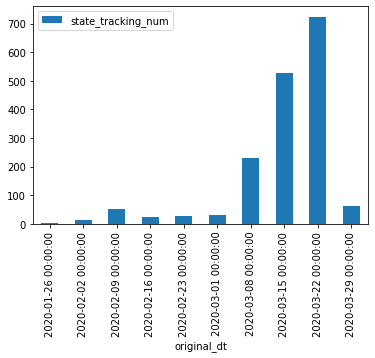

In [64]:
pivot.plot(kind='bar')

In [65]:
df_total_orders = pd.DataFrame(pivot).reset_index()
df_total_orders.columns = ['week', 'num_orders']
df_total_orders.to_csv('output_data/weekly_orders.csv', index=False)

In [66]:
df_compact['worked_by'].value_counts(dropna=False, normalize=True).head(10)

County       0.755882
State        0.176471
City         0.065882
NaN          0.001176
Completed    0.000588
Name: worked_by, dtype: float64

In [67]:
print(df_compact['county'].value_counts(dropna=False, normalize=True).head().sum())
df_compact['county'].value_counts(dropna=False, normalize=True).head()

0.6388235294117647


King         0.297059
Snohomish    0.165882
Thurston     0.072353
Spokane      0.051765
Pierce       0.051765
Name: county, dtype: float64

In [68]:
df_compact['city'].value_counts(dropna=False, normalize=True).head()

Seattle      0.142941
Everett      0.082941
Spokane      0.047647
Shoreline    0.046471
Tumwater     0.034118
Name: city, dtype: float64

In [69]:
df_compact['assignee'].value_counts(dropna=False, normalize=True).head(10)

Logistics Section                               0.572353
NaN                                             0.322941
Planning Section                                0.044118
ESF 7­Resource Management                       0.011176
Logistics Intergovernmental Resources Branch    0.010588
Operations Section                              0.007059
Logistics Deploy and Planning Branch            0.007059
Finance and Administration Section              0.002353
Operations Section Planning Section             0.002353
Logistics Commercial Resource Branch            0.001765
Name: assignee, dtype: float64

In [70]:
print(df_compact['overall_stus'].value_counts(dropna=False, normalize=True).sum())
df_compact['overall_stus'].value_counts(dropna=False, normalize=True)

1.0


Assigned      0.615882
Accepted      0.117647
Completed     0.101176
Unassigned    0.097647
Cancelled     0.049412
On Scene      0.010588
In Transit    0.006471
County        0.001176
Name: overall_stus, dtype: float64

In [71]:
print(df_compact['assignment_stus'].value_counts(dropna=False, normalize=True).sum())
df_compact['assignment_stus'].value_counts(dropna=False, normalize=True)

1.0000000000000002


Assigned                0.601176
NaN                     0.199412
Completed               0.072353
Accepted                0.060000
Cancelled               0.031176
On Scene                0.008824
In Transit              0.007059
Unassigned              0.004706
Assigned Completed      0.002941
Assigned Accepted       0.002353
Cancelled Accepted      0.001176
Completed Assigned      0.001176
Accepted Completed      0.001176
Unassigned Assigned     0.001176
Assigned Cancelled      0.000588
Unassigned Completed    0.000588
On Scene Cancelled      0.000588
Completed Cancelled     0.000588
Cancelled Assigned      0.000588
On Scene Completed      0.000588
Accepted Unassigned     0.000588
Accepted Assigned       0.000588
Logistics Section       0.000588
Name: assignment_stus, dtype: float64

In [72]:
print(df_compact['agency'].value_counts(dropna=False, normalize=True).head(10).sum())
df_compact['agency'].value_counts(dropna=False, normalize=True).head(10)

0.24823529411764705


PHSKC                                   0.070588
WA State DOH                            0.048235
Snohomish Health District               0.021765
DOH IMT                                 0.020588
Sacred Heart Medical                    0.019412
Thurston County Emergency Management    0.017059
Pierce County Emergency Management      0.017059
Kitsap County Dept of Emergency Mgt     0.012353
KCEMS1                                  0.010588
Swedish Edmonds Medical                 0.010588
Name: agency, dtype: float64

In [73]:
df_compact['pty'].value_counts(dropna=False, normalize=True).head(10)

Incident Stabilization    0.929412
NaN                       0.037059
Life Saving               0.027059
Property Preservation     0.004706
Medical equipment         0.001176
City                      0.000588
Name: pty, dtype: float64

In [74]:
df_expanded['subject_std'].value_counts(dropna=False, normalize=True)

Masks                     0.273296
NaN                       0.195410
Disinfectant/Sanitizer    0.123435
Gowns                     0.109875
Gloves                    0.084145
Staffing                  0.063630
PPE                       0.051460
Face Shield               0.038248
Goggles/Glasses           0.032337
Thermometers              0.013213
SWABS                     0.007302
Protective Equipment      0.005216
Medication                0.002434
Name: subject_std, dtype: float64

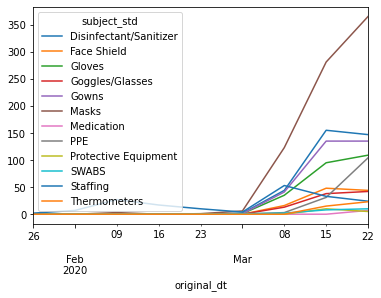

In [75]:
df_expanded_plot = df_expanded[df_expanded['original_dt'] < '2020-03-23']
pivot = df_expanded_plot.pivot_table(index='original_dt', 
                       columns='subject_std',
                       values='state_tracking_num', 
                       aggfunc='count', fill_value = 0).resample('W').sum()
pivot.plot()

# Export

In [76]:
df_compact.to_csv('output_data/csv/df_compact.csv', index=True)
df_expanded.to_csv('output_data/csv/df_expanded.csv', index=True)